## Q1(25%), Q3(75%)구하기
지금까지 평균과 중간값에 대해 알아봤습니다. 데이터의 50% 지점을 의미하는 중간값을 구할 줄 안다면 Q1(데이터의 25% 지점)과 Q3(데이터의 75% 지점)도 쉽게 구할 수 있는데요.

일단 아래와 같은 데이터셋이 있다고 합시다. 여기서 중간값은 딱 가운데에 있는 86이겠죠?
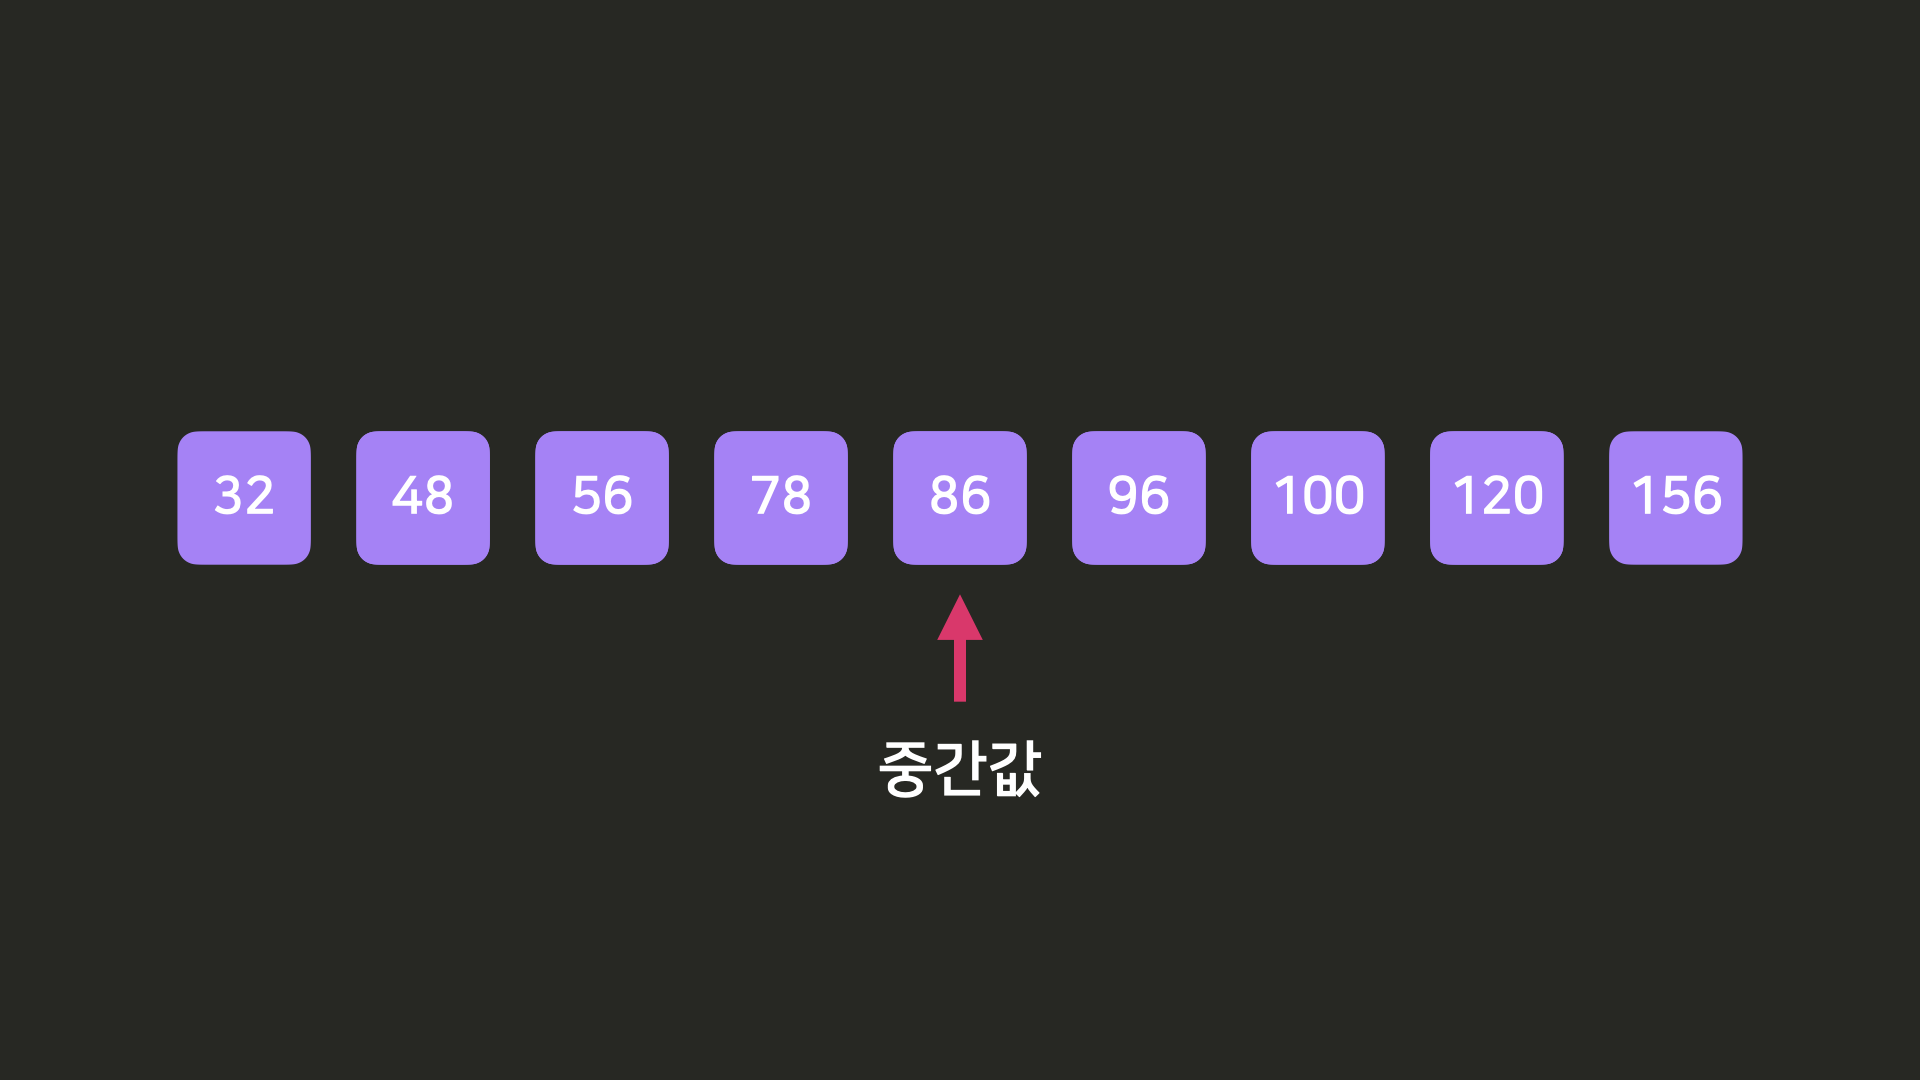

그리고 이 데이터를 중간값을 기준으로 둘로 나눠 볼게요. 아래 이미지처럼 첫 번째 값부터 중간값까지, 중간값부터 가장 마지막 값까지 이렇게 둘로 나눠진다고 보시면 됩니다. 여기 왼쪽 묶음에서 중간값은 56인데요. 이건 50%의 중간, 즉 25% 지점에 해당하는 Q1 값이라고 볼 수 있습니다. 반대로 오른쪽 묶음에 있는 중간값 100은 75% 지점, 즉 Q3이 되겠죠.
 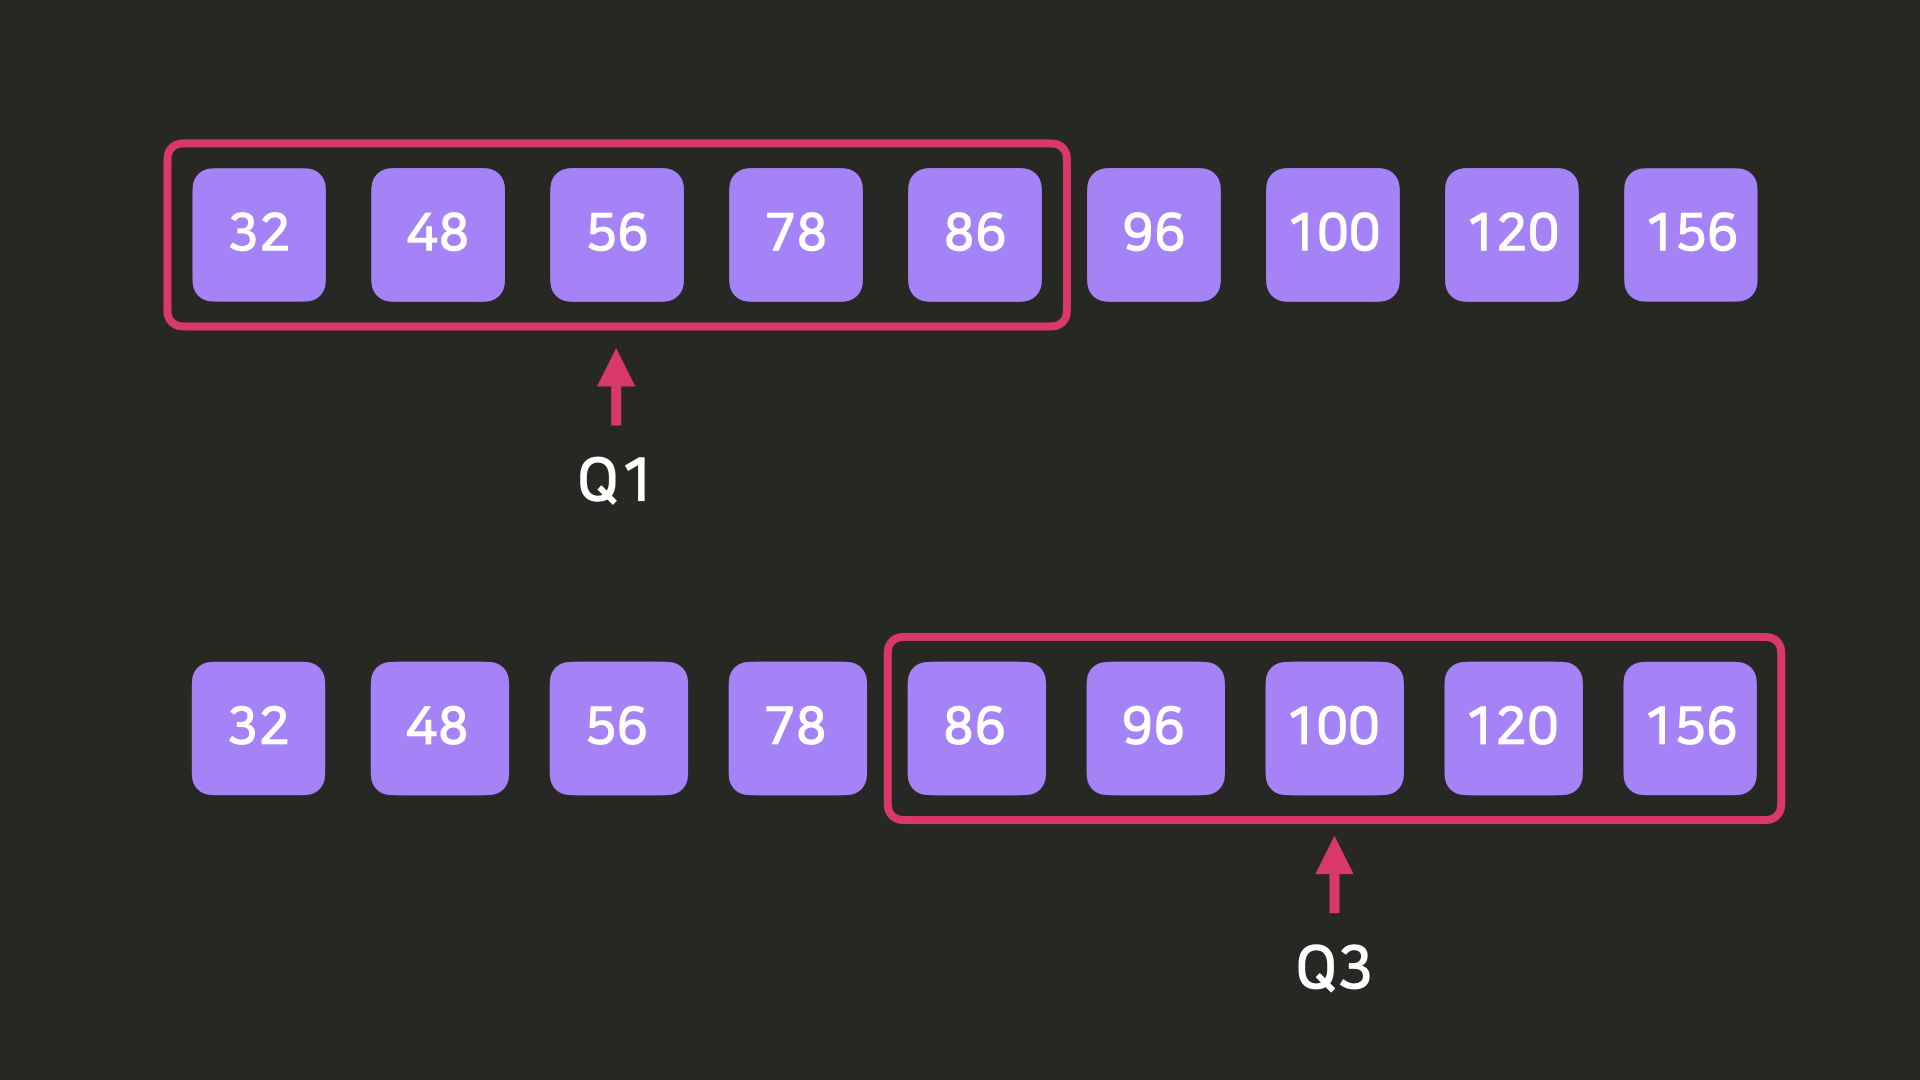

---
---
그런데, 아래와 같이 Q1, Q2, Q3의 위치를 딱 정할 수 없는 경우도 있습니다. 지금처럼 데이터의 개수가 짝수일 때 중간값(Q2)을 구하려면 가운데에 있는 두 값의 합을 2로 나눠 주면 된다고 배웠었죠? 즉, 여기서 중간값은 24와 35, 두 값의 중간 지점에 있다고 볼 수 있기 때문에 24 더하기 35를 2로 나눈 29.5가 됩니다.
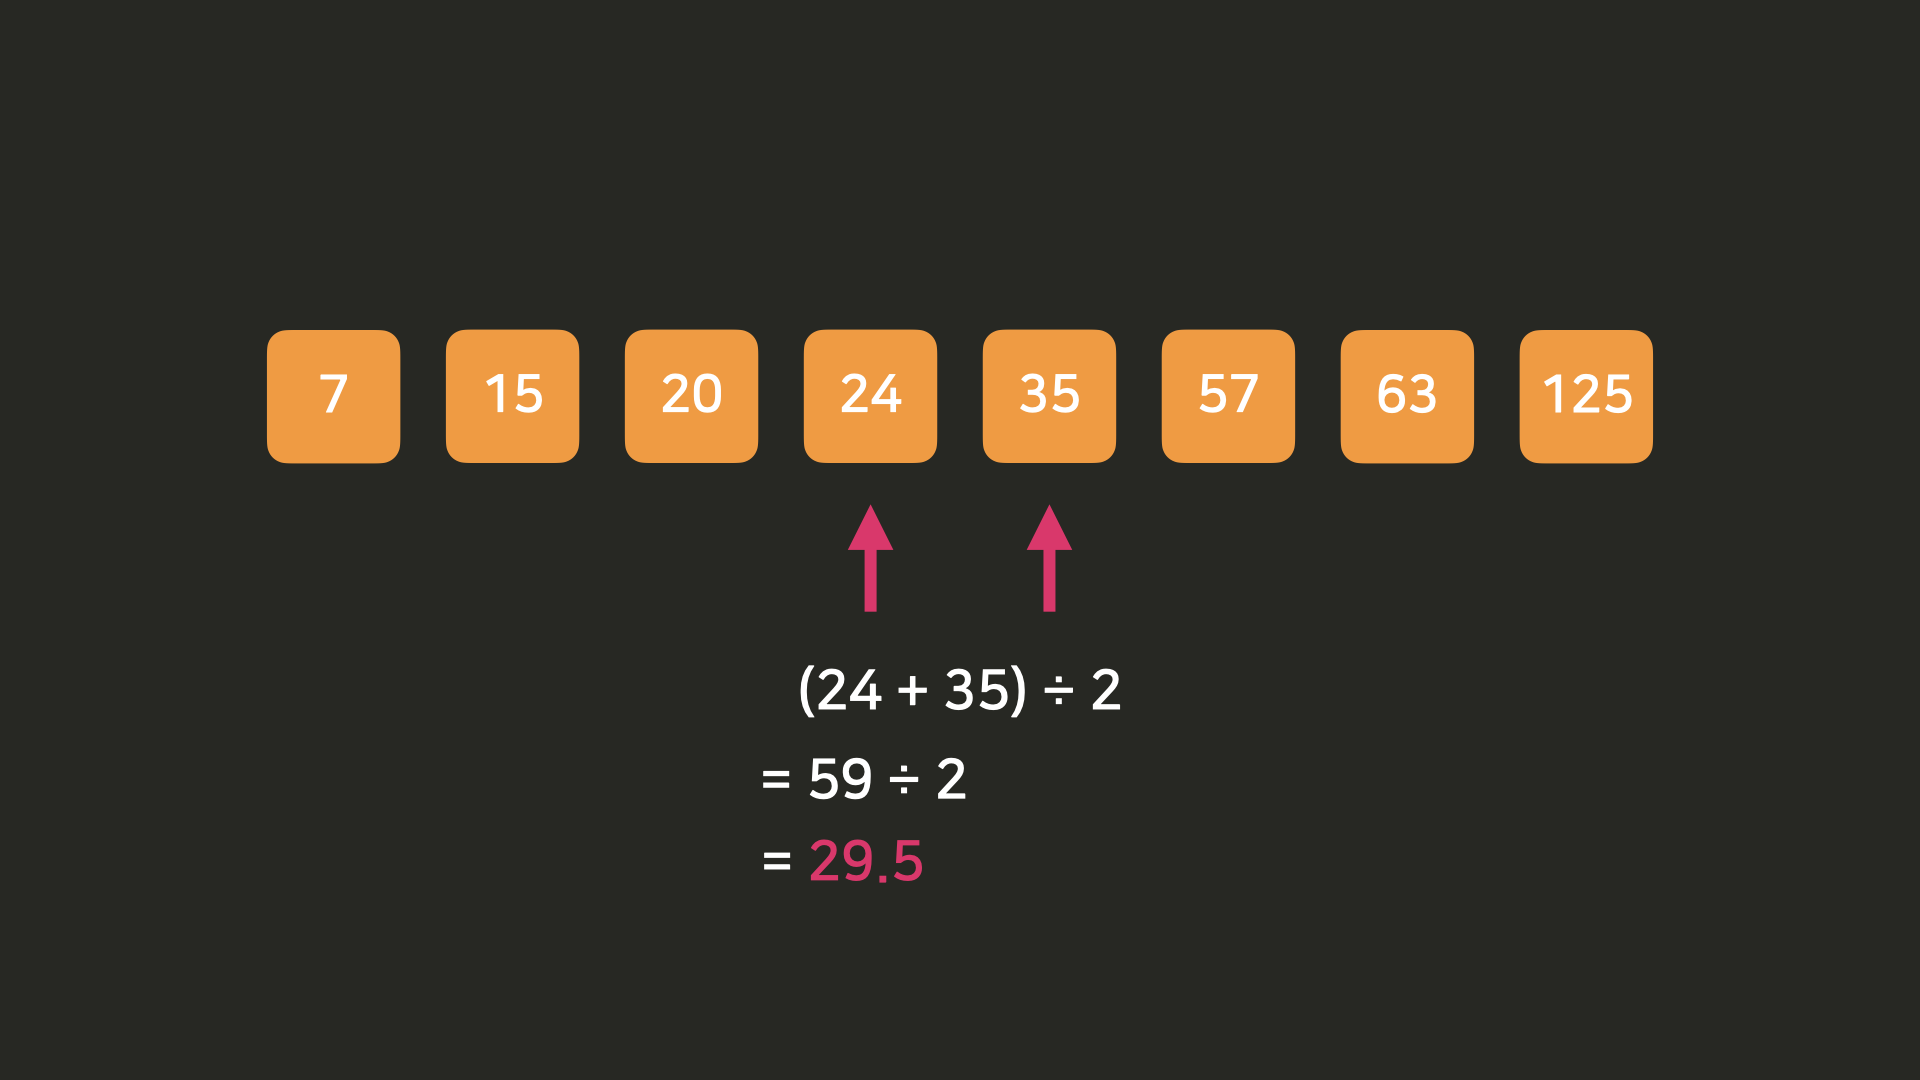

#### 데이터 셋의 개수가 짝수개일때

이번엔 Q1을 구해 볼게요. 사실 데이터에서 특정 퍼센트 지점에 있는 값을 구하는 방법은 여러 가지가 있지만, numpy와 pandas에서 기본으로 사용되는 방식을 대표로 설명드리겠습니다.

먼저 Q1이 몇 번 인덱스에 있는 값인지 구해야 하는데요. *데이터에서 특정 퍼센트 지점의 인덱스를 구하려면 데이터의 개수에서 1을 뺀 뒤, 여기에 원하는 숫자를 곱해주면 됩니다.* 지금은 데이터의 개수가 총 8개니까, 
(
8
−
1
)
∗
0.25
를 해서 1.75라는 결과물을 얻을 수 있습니다. (참고로 데이터 개수에서 1을 빼는 건, 파이썬에서 인덱스가 0부터 시작하니까 이를 보정해 주기 위한 거라고 보시면 됩니다!)

그런데 0번, 2번, 4번… 이런 정수 값이 아니라 1.75번 인덱스에 있는 숫자를 어떻게 구해야 할까요? 일단 1.75번 인덱스는 1번 인덱스에 있는 15와 2번 인덱스에 있는 20 사이에 있다고 볼 수 있습니다. 이제 1.75에서 정수 부분 1이 무엇을 의미하는지 알았으니까, 0.75라는 소수 부분을 고려할 차례네요.

쉽게 말하자면, 소수 부분은 두 값 사이에서 정확히 어느 정도 위치에 있는지를 의미한다고 볼 수 있습니다. 0.75를 분수로 표현하면 4분의 3인데요. 즉, Q1은 아래 그림과 같이 15와 20 사이에서 4분의 3 지점에 위치하고 있습니다. 이 값을 구하려면 
15
∗
(
1
−
0.75
)
+
20
∗
0.75

를 계산하면 됩니다. 즉, Q1은 18.75가 됩니다.

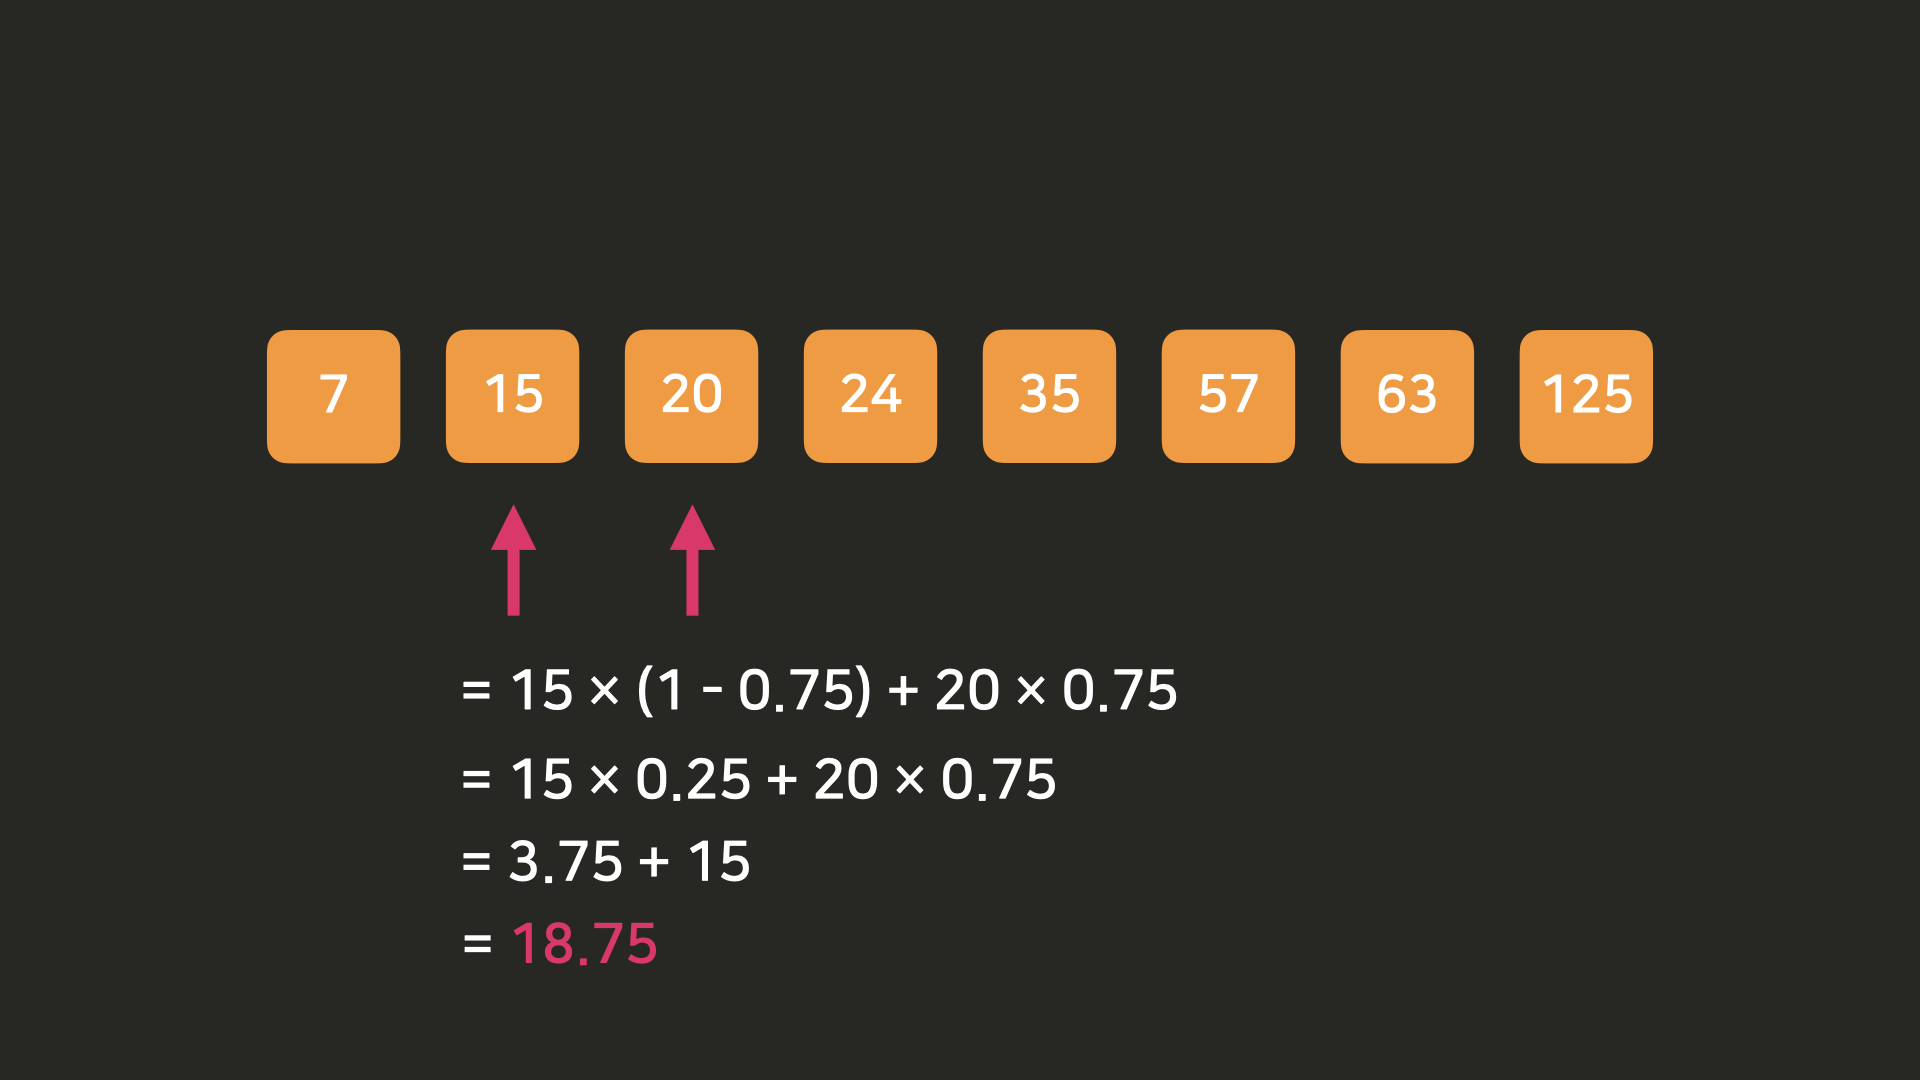

그러면 Q3도 계산해 볼게요. Q3의 인덱스는 
(
8
−
1
)
∗
0.75

를 해서 5.25가 되고요. 즉, 57(5번 인덱스)과 63(6번 인덱스) 사이에서 4분의 1 지점에 위치한 값이라고 할 수 있습니다. 이번에는 
57
∗
(
1
−
0.25
)
+
63
∗
0.25

를 계산해 주면, Q3은 58.5가 되죠.

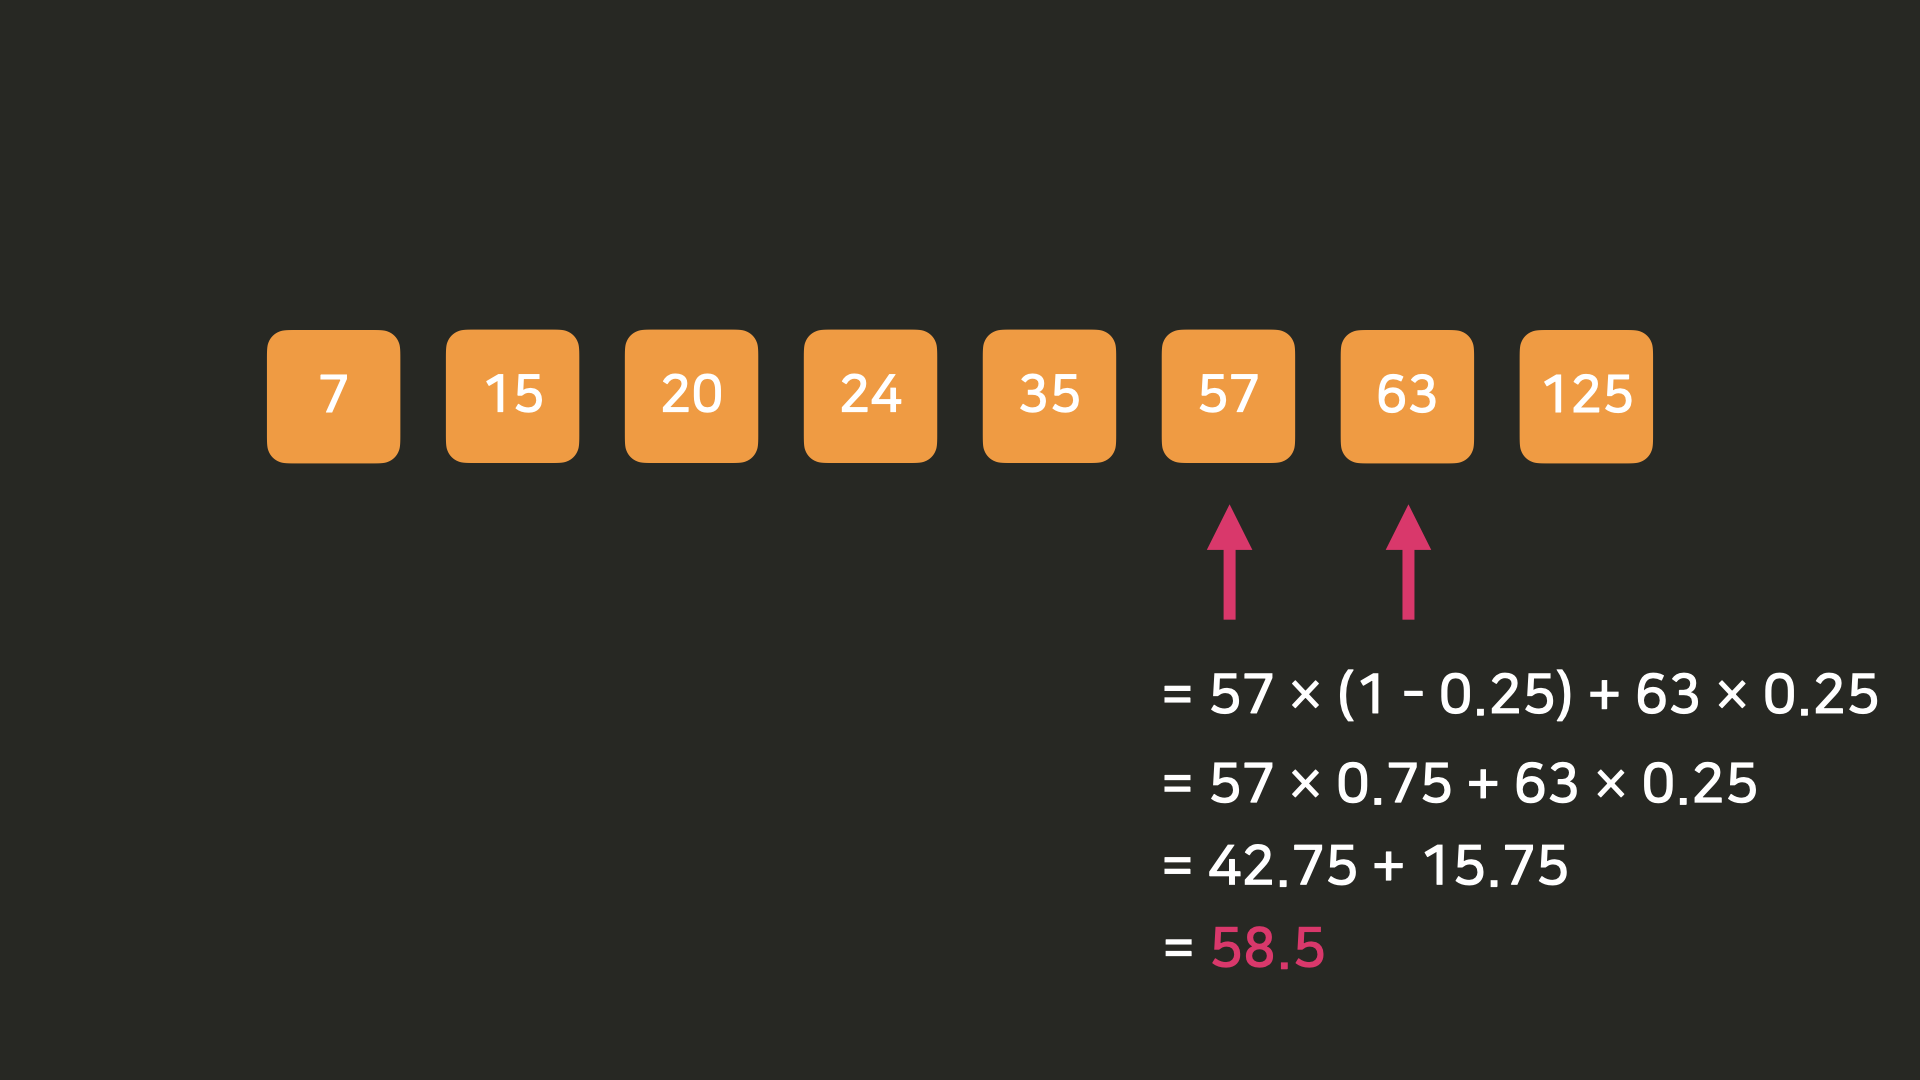

---
---
## 이상값 구하기
박스 플롯에서 박스와 위스커 바깥에 있는 점들을 이상점(outlier)라고 부른다고 배웠는데요. 딱 봤을 때 다른 값들에 비해 유독 크거나 작은 값들을 이상점이라고 판단할 수도 있겠지만, 이게 이상점인지 아닌지 애매한 경우도 있겠죠?

이상점을 구분하기 위한 명확한 기준이 몇 가지 있는데, 가장 대표적인 것 중 하나로 위에서 구한 Q1과 Q3 값을 활용하는 방식이 있습니다. 이 방식을 사용하려면 일단, Q3과 Q1 사이의 거리를 알아야 하는데요. 그냥 Q3에서 Q1을 빼주면 되고, 이 값을 바로 IQR(Interquartile Range)라고 부릅니다. 방금 전에 사용한 데이터를 다시 예로 들면, IQR은 Q3(58.5)에서 Q1(18.75)를 뺀 39.75가 됩니다.
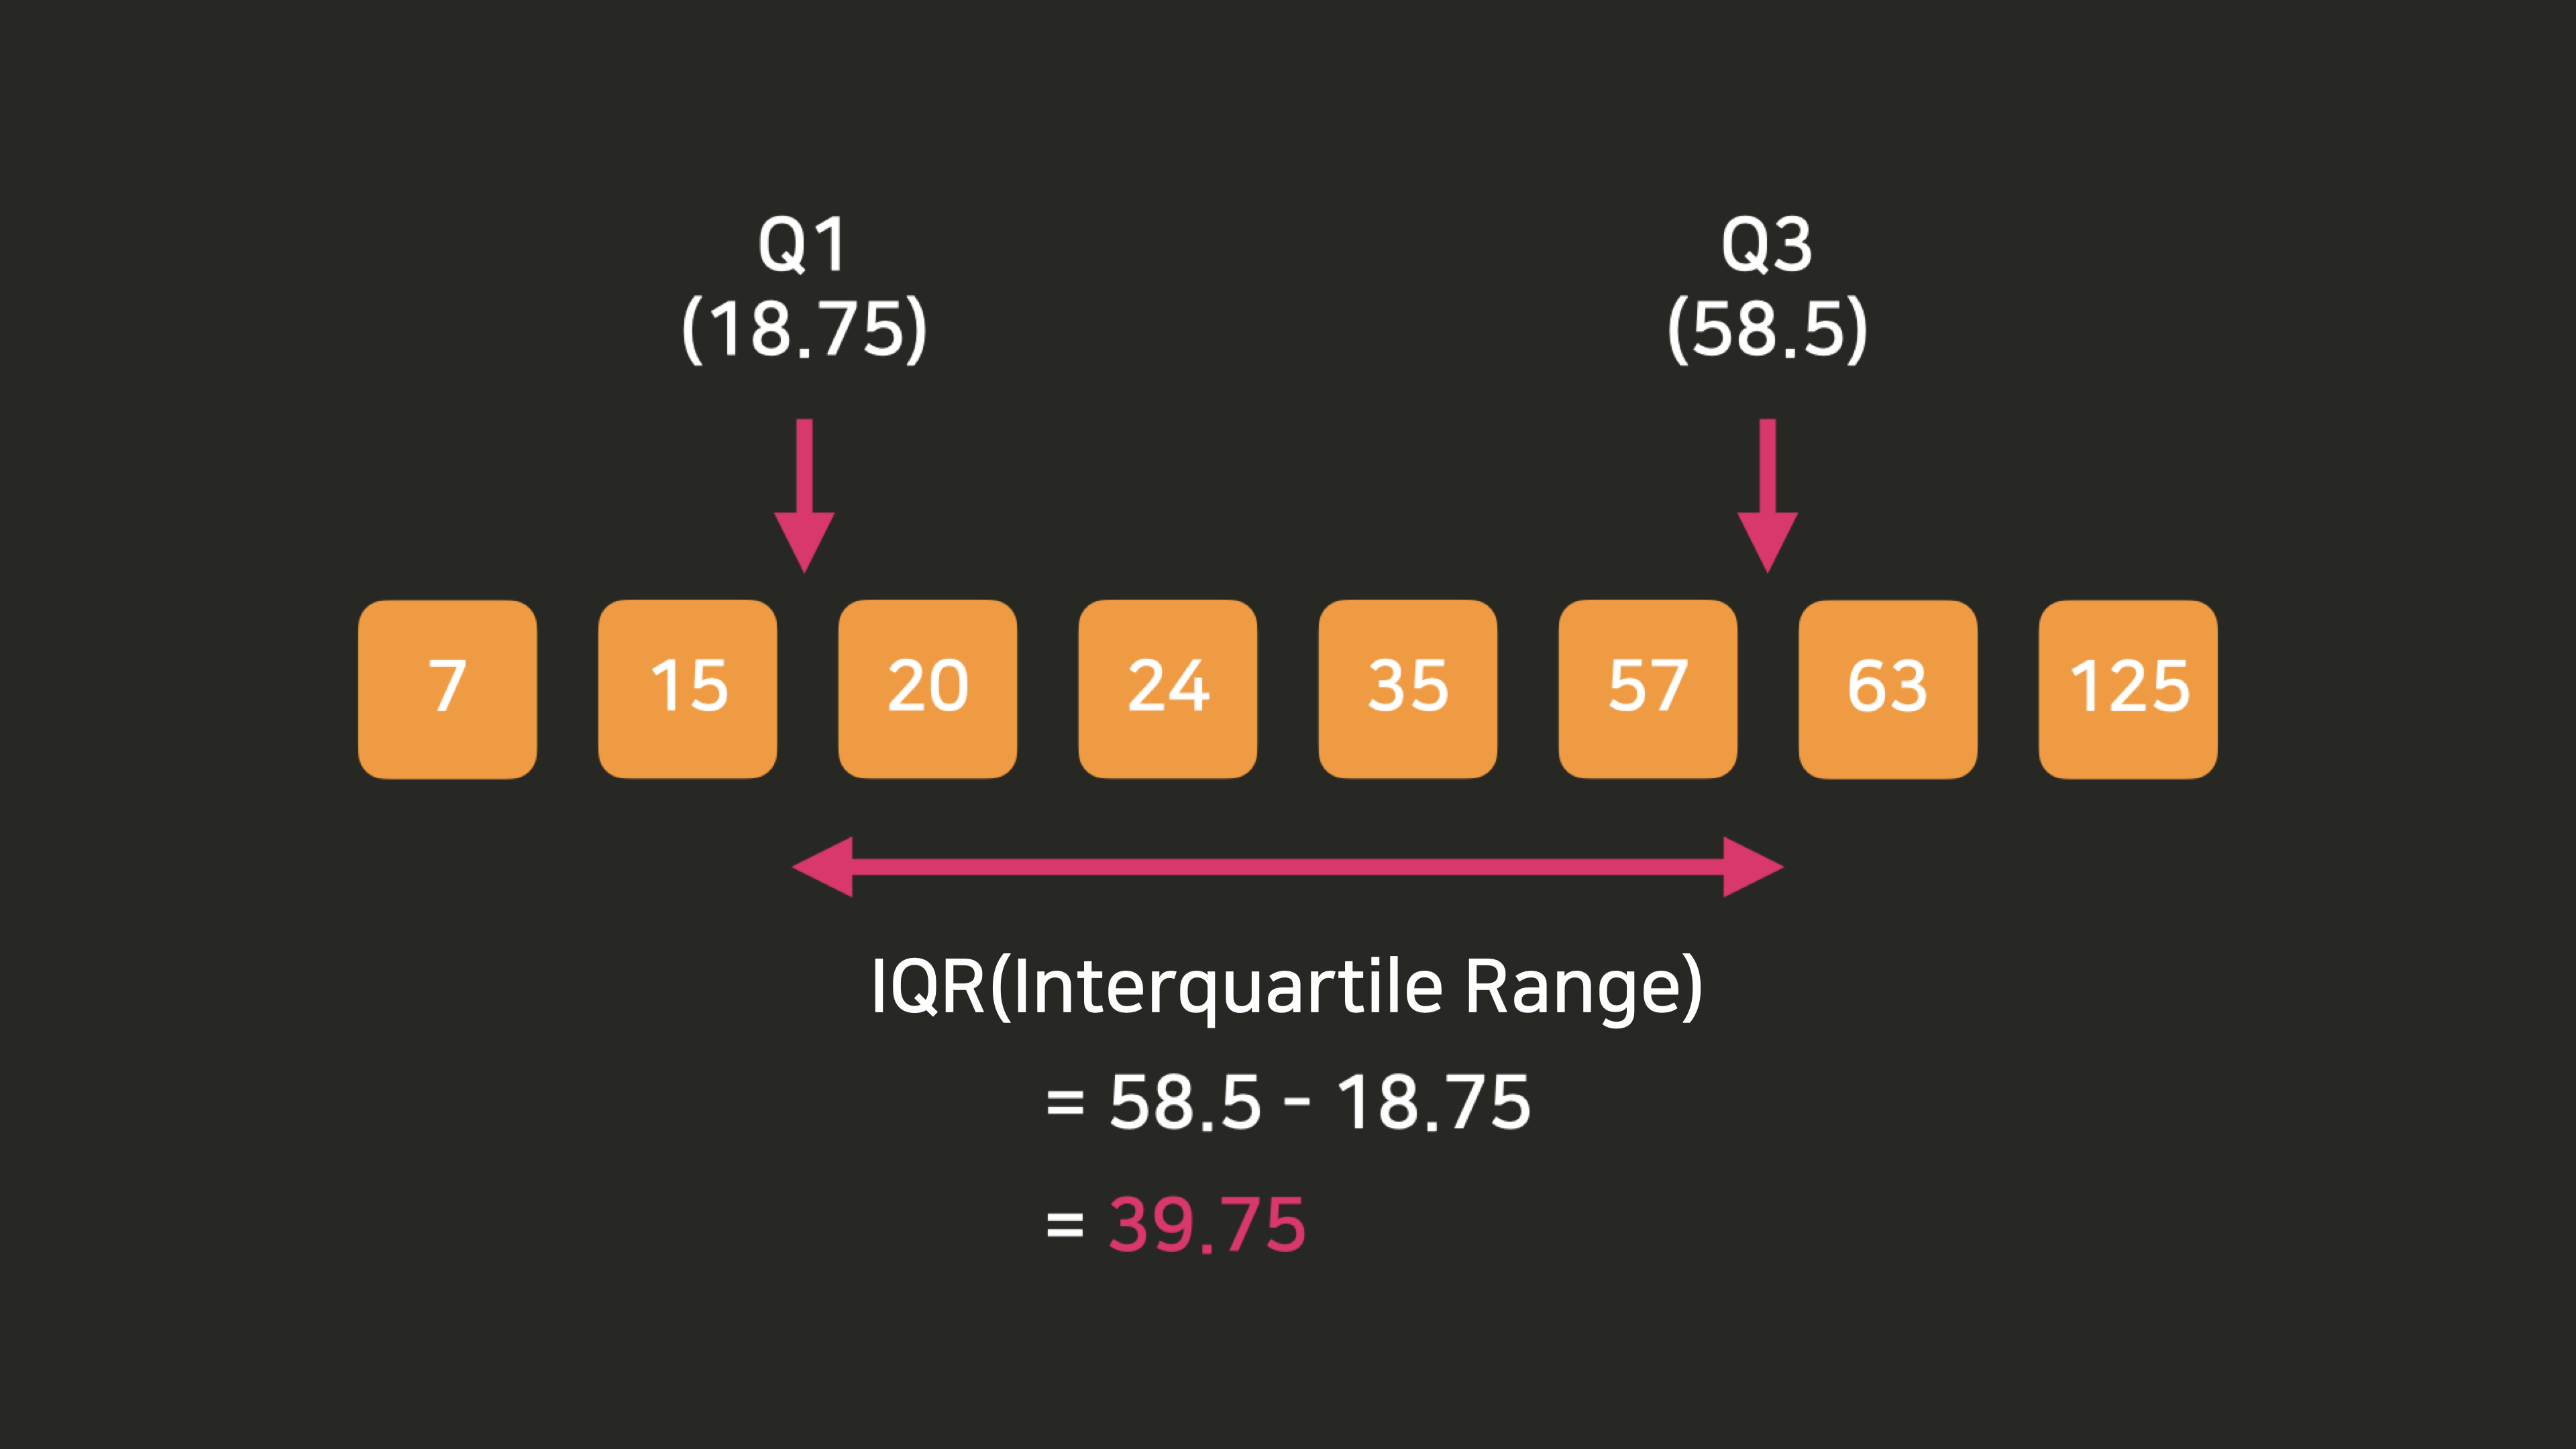

그리고 보통 Q1 지점에서 아래로 1.5 IQR 더 떨어져 있거나, Q3 지점에서 위로 1.5 IQR 더 떨어져 있는 값은 이상점이라고 판단합니다. 아까 Q1과 Q3을 구한 데이터를 예로 들면, 이상값으로 판단하는 기준점은 -40.875와 118.125가 됩니다. 다 0보다 큰 숫자들이니까, -40.875보다 작은 값은 없는 것 같고 125는 118.125보다 크니까 이상점이라고 볼 수 있겠네요.
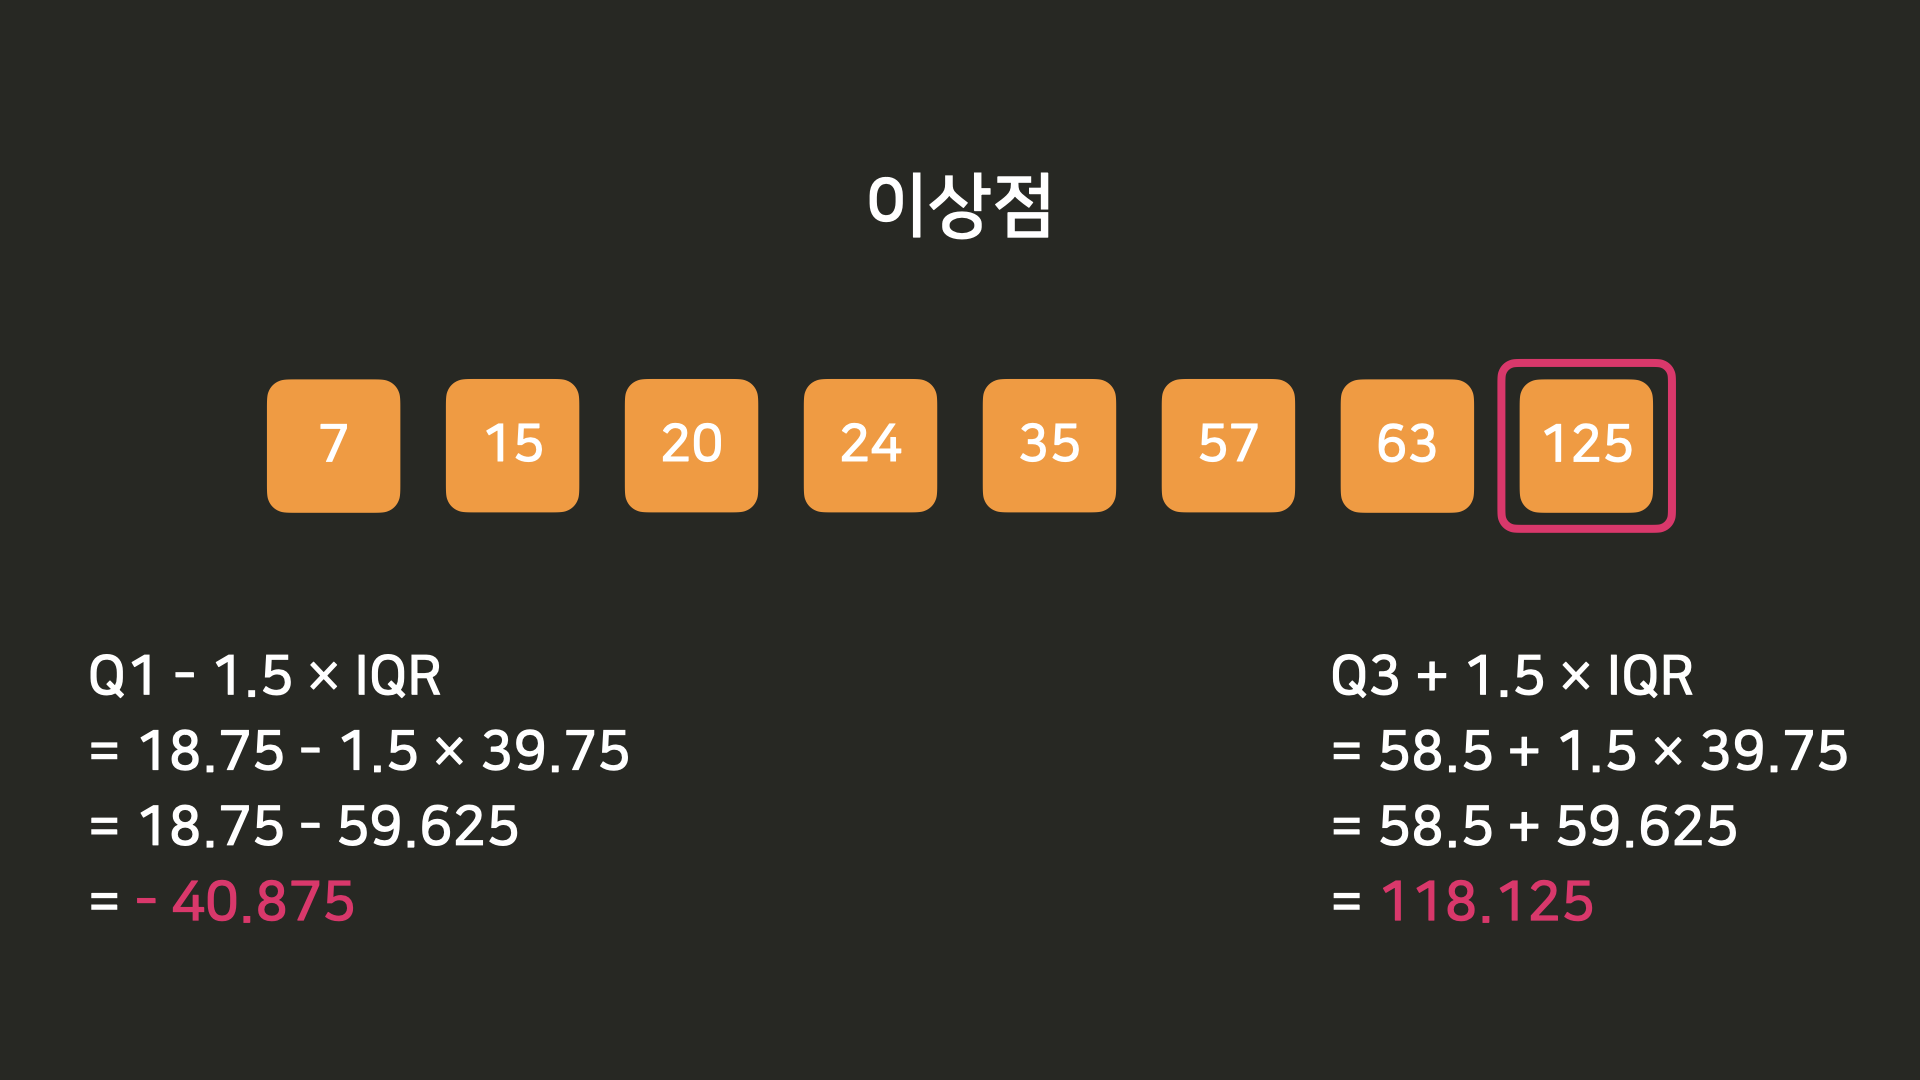